# My First kaggle Competitions!!!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import missingno as msno
import matplotlib.pyplot as plt
import string
import re

# Load Dataset & Get Information

In [2]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# EDA

### Missing Value Check

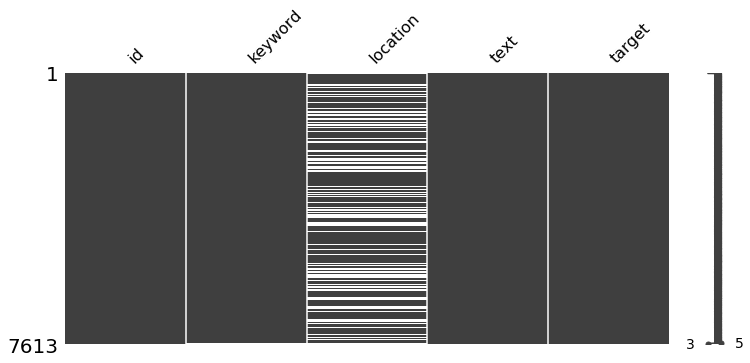

In [4]:
msno.matrix(train_df, figsize=(12,5))

### How many Real Disater?

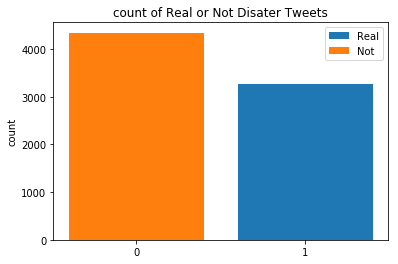

In [5]:
plt.bar(train_df[train_df['target']==1]['target'].unique(), train_df[train_df['target']==1]['target'].value_counts(), label='Real')
plt.bar(train_df[train_df['target']==0]['target'].unique(), train_df[train_df['target']==0]['target'].value_counts(), label='Not')
plt.title("count of Real or Not Disater Tweets")
plt.ylabel("count")
plt.xticks(train_df['target'].unique(),('1','0'))
plt.legend()

# Text Preprocessing

In [6]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def clean_tweets(tweet):
    """Removes links and non-ASCII characters"""
    
    tweet = ''.join([x for x in tweet if x in string.printable])
    
    # Removing URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    return tweet

train_df['text']=train_df['text'].apply(clean_tweets)
test_df['text']=test_df['text'].apply(clean_tweets)

In [8]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train_df['text']=train_df['text'].apply(remove_emoji)
test_df['text']=test_df['text'].apply(remove_emoji)

In [9]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def remove_punctuations(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    
    if '...' not in text:
        text = text.replace('..', ' ... ')
    
    return text

train_df['text']=train_df['text'].apply(remove_punctuations)
test_df['text']=test_df['text'].apply(remove_punctuations)

In [10]:
def remove_numbers(text):
    
    for number in string.digits:
        text = text.replace(number, '')

    return text

train_df['text']=train_df['text'].apply(remove_numbers)
test_df['text']=test_df['text'].apply(remove_numbers)

In [11]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

In [12]:
clf = linear_model.RidgeClassifier()

In [13]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59098143, 0.56090373, 0.6287953 ])

In [14]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [15]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [16]:
sample_submission["target"] = clf.predict(test_vectors)

In [17]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1


In [18]:
sample_submission.to_csv("submission.csv", index=False, header=True)